# Fraud Transaction Detection



The goal of this project to utilize advanced data mining and machine learning techniques for real-time fraud detection in financial data. Detecting fraud is particularly challenging due to the relatively small number of fraudulent cases hidden within vast populations of legitimate transactions.



The problem is to develop an effective fraud detection system using machine learning and data mining techniques that can efficiently analyze large volumes of transactions, identify fraudulent activity, and minimize losses across various industries.

## Import necessary libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import average_precision_score

%matplotlib inline



randomState = 5

np.random.seed(randomState)

## Load the Train and Test data

In [2]:
# Load the training and test datasets

train_data = pd.read_csv(r'/kaggle/input/fraud-transaction-detection/train.csv')

test_data = pd.read_csv(r'/kaggle/input/fraud-transaction-detection/test.csv')

#### Statistics about Train data and Test data

Train data has 4453834 rows and Test data 1908786 rows \

There are no 0 or NA values in both the Train and Test dataset

In [3]:
train_data.head(5)

,Id,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,2408105,202,CASH_IN,26771.98,C1757325207,27521.00,54292.98,C1063361489,7175503.03,7148731.05,0,0
1,662431,36,CASH_OUT,344879.65,C1581387557,0.00,0.00,C1423956695,3731846.57,4076726.22,0,0
2,496596,20,TRANSFER,1862607.84,C40667532,0.00,0.00,C2074118913,3329828.01,4913631.27,0,0
3,5053742,354,PAYMENT,37739.35,C650378192,66684.93,28945.58,M1029189176,0.00,0.00,0,0
4,755622,38,CASH_OUT,376055.13,C1711774391,22501.00,0.00,C109054029,182350.43,558405.55,0,0


In [4]:
test_data.head(5)

,Id,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,3737324,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15
1,264915,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00
2,85648,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80
3,5899327,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08
4,2544264,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60


In [5]:
print('**Train data**')

print(train_data.info())

print('\n')

print('**Test data**')

print(test_data.info())

**Train data**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453834 entries, 0 to 4453833
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id              int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   nameDest        object 
 8   oldbalanceDest  float64
 9   newbalanceDest  float64
 10  isFraud         int64  
 11  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 407.8+ MB
None


**Test data**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908786 entries, 0 to 1908785
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id              int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   na

In [6]:
print('train data',train_data.isna().sum())

print('test data',test_data.isna().sum())

train data Id                0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
test data Id                0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [7]:
print('The percentage of transactions that are fraud in the entire training dataset is',len(train_data[train_data.isFraud == 1])/len(train_data))

The percentage of transactions that are fraud in the entire training dataset is 0.0012973092396348855


## Plot the distribution of the transaction types in Train and Test data



In both the Train and Test Data the CASH_OUT and PAYMENT are the categories with the highest distribution and DEBIT is the lowest.

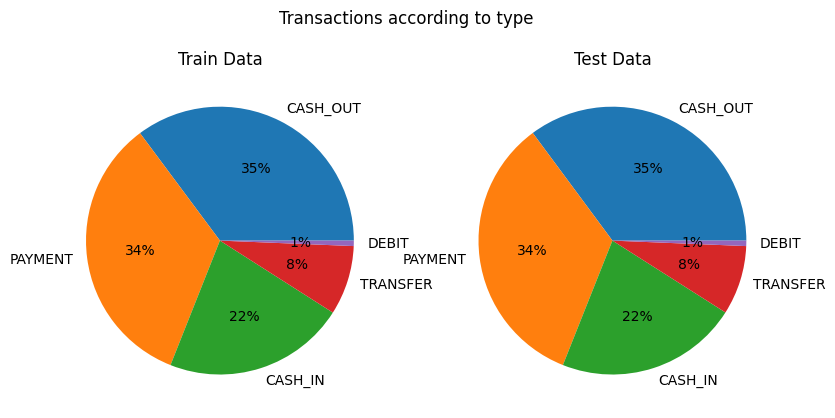

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

fig.tight_layout()

plt.suptitle("Transactions according to type")

axes[0].set_title('Train Data')

axes[0].pie(train_data.type.value_counts().values,labels=train_data.type.value_counts().index,autopct='%.0f%%')



axes[1].set_title('Test Data')

axes[1].pie(test_data.type.value_counts().values,labels=test_data.type.value_counts().index,autopct='%.0f%%')



plt.show()

### Plotting the Fraud vs other features

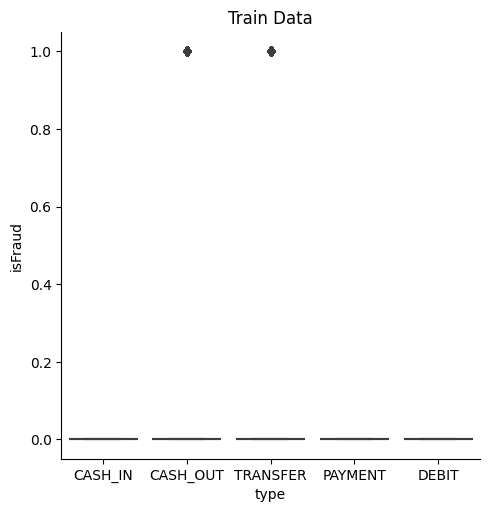

In [9]:
sns.catplot(data=train_data, x="type", y="isFraud", kind = 'box').set(title='Train Data')

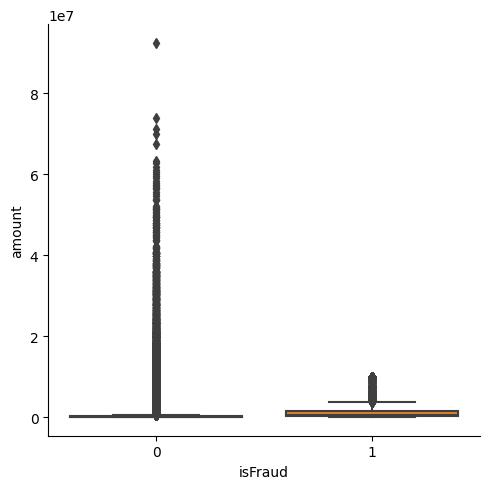

In [10]:
sns.catplot(data=train_data, y="amount", x="isFraud", kind = 'box')

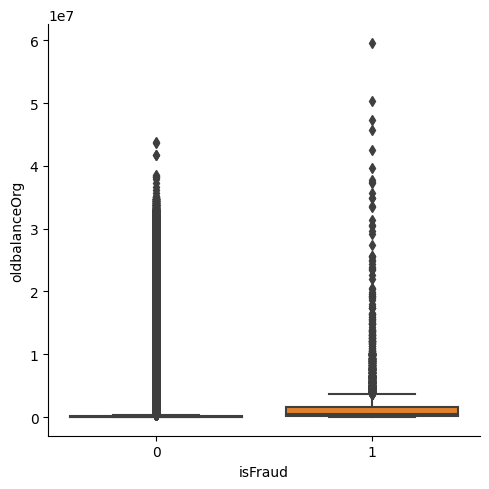

In [11]:
sns.catplot(data=train_data, y="oldbalanceOrg", x="isFraud", kind = 'box')

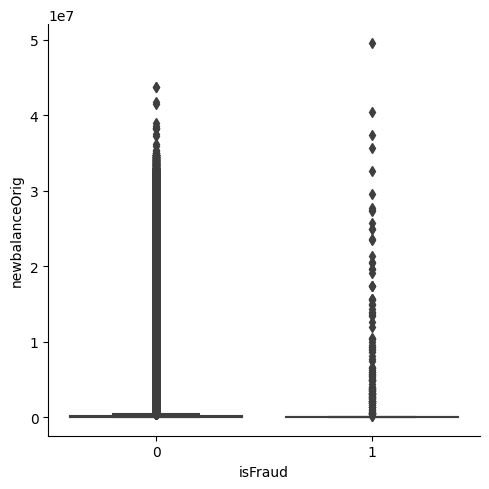

In [12]:
sns.catplot(data=train_data, y="newbalanceOrig", x="isFraud", kind = 'box')

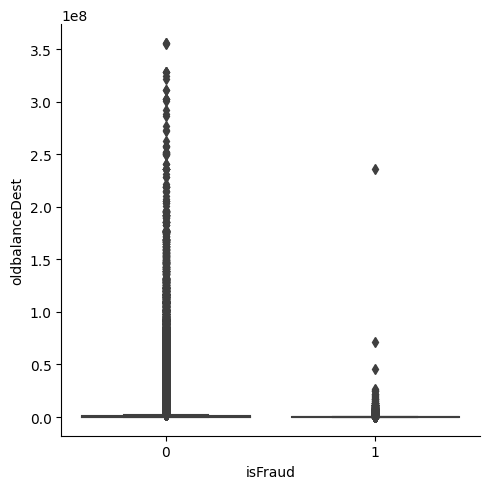

In [13]:
sns.catplot(data=train_data, y="oldbalanceDest", x="isFraud", kind = 'box')

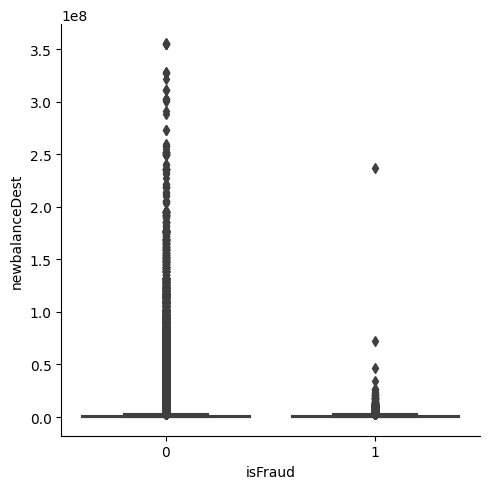

In [14]:
sns.catplot(data=train_data, y="newbalanceDest", x="isFraud", kind='box')

From the above plots we can see that data is fairly straightforward, we can also see that the FRAUD transactions exists only in the CASH_OUT and TRANSFER types of transactions.

In [15]:
dfFraudTransfer = train_data.loc[(train_data.isFraud == 1) & (train_data.type == 'TRANSFER')]

dfFraudCashout = train_data.loc[(train_data.isFraud == 1) & (train_data.type == 'CASH_OUT')]

print('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 2889
The number of fraudulent CASH_OUTs = 2889


We can see that we have a feature isFlaggedFraud, let's analyze that to see if contains any value for us

In [16]:
print('The type of transactions in which isFlaggedFraud is set:{}'.format(list(train_data.loc[train_data.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = train_data.loc[train_data.type == 'TRANSFER']
dfFlagged = train_data.loc[train_data.isFlaggedFraud == 1]
dfNotFlagged = train_data.loc[train_data.isFlaggedFraud == 0]

print('Min amount transacted when isFlaggedFraud is set = {}'.format(dfFlagged.amount.min()))
print('Max amount transacted in a TRANSFER where isFlaggedFraud is not set = {}'.format(dfNotFlagged.amount.max()))

The type of transactions in which isFlaggedFraud is set:['TRANSFER']
Min amount transacted when isFlaggedFraud is set = 353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set = 92445516.64


#### Split the train data into X and Y for modelling purposes, with isFraud being our target variable

In [17]:
X = train_data

Y = X['isFraud']

del X['isFraud']

## Feature Engineering



We create two new features based on our understand of the errors in the two data types

In [18]:
def check_discrepancy_features(data):
    
    data['debit_fraud_flag']    = np.where((data['type'] == 'DEBIT')    & (data['newbalanceOrig']  != data['oldbalanceOrg'] - data['amount']) | (data['newbalanceDest']  != data['oldbalanceDest'] + data['amount']),1, 0)

    data['cash_in_fraud_flag']  = np.where((data['type'] == 'CASH_IN')  & (data['newbalanceOrig']  != data['oldbalanceOrg'] + data['amount']) | (data['newbalanceDest']  != data['oldbalanceDest'] - data['amount']),1, 0)

    data['cash_out_fraud_flag'] = np.where((data['type'] == 'CASH_OUT') & ((data['newbalanceOrig'] != data['oldbalanceOrg'] - data['amount']) | (data['newbalanceDest']  != data['oldbalanceDest'] + data['amount'])),1, 0)

    data['transfer_fraud_flag'] = np.where((data['type'] == 'TRANSFER') & ((data['newbalanceOrig'] != data['oldbalanceOrg'] - data['amount']) | (data['newbalanceDest'] != data['oldbalanceDest'] + data['amount'])),1, 0)

    data['payment_fraud_flag']  = np.where((data['type'] == 'PAYMENT')  & ((data['newbalanceOrig'] != data['oldbalanceOrg'] - data['amount'])),1, 0)

    return data

In [19]:
X = check_discrepancy_features(X)

Dropping the columns that we don't want to consider for our modelling purposes

In [20]:
# Features and Target variable for training

to_drop = ['Id', 'nameOrig', 'nameDest', 'isFlaggedFraud']

t_X = X.drop(to_drop, axis=1)  # Drop the Id and target from the features

t_X = pd.get_dummies(t_X)

t_Y = Y  # Target variable

#### Plotting a correlation matrix to check we have any strongly correlated featues

<Axes: >

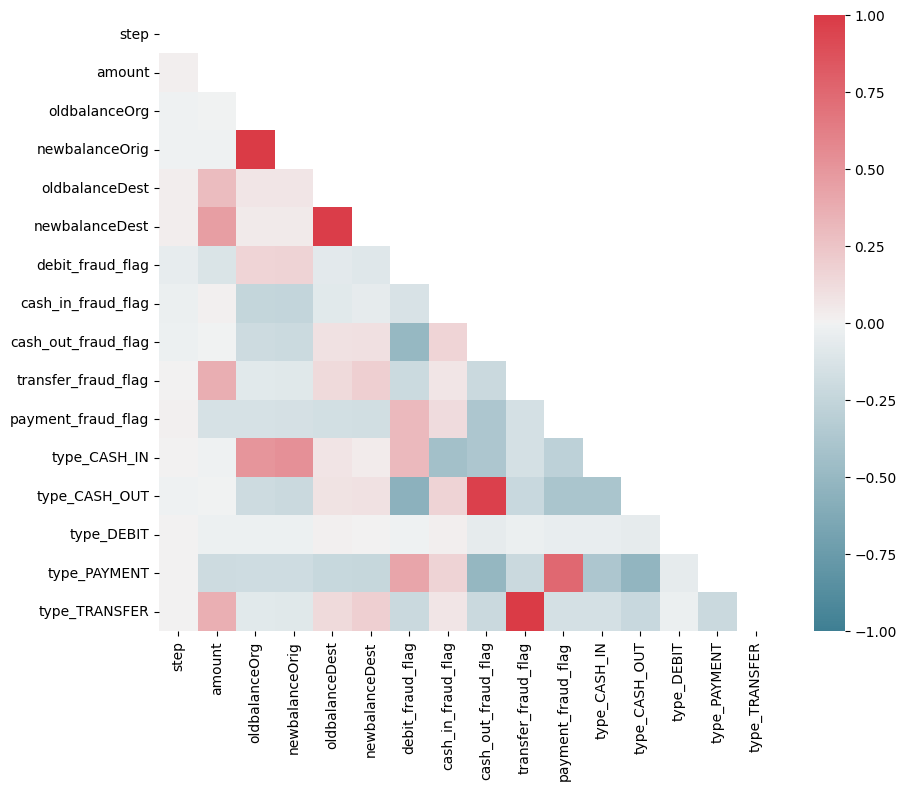

In [21]:
f, ax = plt.subplots(figsize=(10, 8))

corr = t_X.corr()

mask = np.triu(corr)

sns.heatmap(corr,

    cmap=sns.diverging_palette(220, 10, as_cmap=True),mask = mask,

    vmin=-1.0, vmax=1.0,

    square=True, ax=ax)

## Split the data into Train and Test



To start let us consider 80% Train data and 20% Test data, 3563067 in Train and 890767 in Test.



Since this is a classification problem, Let's consider Random Forest Classifer for our use case

In [24]:
trainX, testX, trainY, testY = train_test_split(t_X, t_Y, test_size = 0.2, random_state = randomState)

In [25]:
len(trainX), len(testX), len(trainY), len(testY)

(3563067, 890767, 3563067, 890767)

## Baseline model

In [26]:
# Initialize the Random Forest Classifier

model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

# Train the model

model.fit(trainX, trainY)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [27]:
y_val_pred = model.predict(testX)

print("Validation Accuracy:", accuracy_score(testY, y_val_pred))

print("Validation Classification Report:\n", classification_report(testY, y_val_pred))

print("Validation ROC AUC Score:", roc_auc_score(testY, y_val_pred))

Validation Accuracy: 0.9998776335450236
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    889613
           1       1.00      0.91      0.95      1154

    accuracy                           1.00    890767
   macro avg       1.00      0.95      0.98    890767
weighted avg       1.00      1.00      1.00    890767

Validation ROC AUC Score: 0.9536383906470763


We can see the model is performing well, so let's retrain the model on the entire dataset and predict it for the real test data

## Final model



We recreate this model using the entire training dataset

In [28]:
# Initialize the Random Forest Classifier

model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

# Train the model

model.fit(t_X, t_Y)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

## Predict on the test data

In [29]:
# Features and Target variable for testing

test_data_X = check_discrepancy_features(test_data)

to_drop = ['Id', 'nameOrig', 'nameDest']

dropped_test_data_X = test_data_X.drop(to_drop, axis=1)  # Drop the Id and target from the features

dropped_test_data_X = pd.get_dummies(dropped_test_data_X)

In [30]:
test_y_val_pred = model.predict(dropped_test_data_X)

In [31]:
test_data_X['test_y_val_pred'] = test_y_val_pred

## Create CSV submission

In [33]:
# Create a submission DataFrame with 'Id' and 'isFraud'

submission = pd.DataFrame({

    'Id': test_data_X['Id'],  # Test data Id column

    'isFraud': test_data_X['test_y_val_pred']  # Predicted fraud labels

})

# Save the submission to CSV

submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
